# Project 01 - Alignment

## Student Information

- Full name: Nguyễn Lê Hùng
- Student ID: 22127135

## Required Libraries

In [155]:
# IMPORT YOUR LIBS HERE
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


## Function Definitions

In [211]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
    
        Image object
    '''
    return Image.open(img_path)

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : 
        Image object
    '''
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : 
        Image object
    img_path : str
        Path to save the image
    '''
    img.save(img_path)

def change_exposure(image, factor):
 
    np_image = np.array([factor], dtype=np.int16)
    np_image = np.clip(image + np_image, 0, 255).astype(np.uint8)
    return Image.fromarray(np_image.astype(np.uint8))

def change_contrast(image, factor):
    '''
    Change the contrast of an image

    Parameters
    ----------
    image : 
        Image object
    factor : float
        Contrast factor

    Returns
    -------
        Image with changed contrast
    '''
    mean = np.mean(np.array(image), axis=(0, 1), keepdims=True)
    np_image = np.array(image, dtype=np.float32)
    np_image = (np_image - mean) * factor + mean
    np_image = np.clip(np_image, 0, 255)
    return Image.fromarray(np_image.astype(np.uint8))

def flip_image(image, direction='horizontal'):
    '''
    Flip the image horizontally or vertically

    Parameters
    ----------
    image : 
        Image object
    direction : str, optional
        Direction to flip the image ('horizontal' or 'vertical')

    Returns
    -------
    
        Flipped image
    '''
    np_image = np.array(image)
    if direction == 'horizontal':
        np_image = np_image[:, ::-1]
    elif direction == 'vertical':
        np_image = np_image[::-1, :]
    return Image.fromarray(np_image)

def convert_to_grayscale(image):
    '''
    Convert the image to grayscale

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Grayscale image
    '''
    np_image = np.array(image)
    grayscale = np.dot(np_image[..., :3], [0.2989, 0.5870, 0.1140])
    return Image.fromarray(grayscale.astype(np.uint8))

def convert_to_sepia(image):
    '''
    Convert the image to sepia tone

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Sepia toned image
    '''
    np_image = np.array(image)
    tr = np_image[..., 0] * 0.393 + np_image[..., 1] * 0.769 + np_image[..., 2] * 0.189
    tg = np_image[..., 0] * 0.349 + np_image[..., 1] * 0.686 + np_image[..., 2] * 0.168
    tb = np_image[..., 0] * 0.272 + np_image[..., 1] * 0.534 + np_image[..., 2] * 0.131
    sepia = np.stack((tr, tg, tb), axis=-1)
    sepia = np.clip(sepia, 0, 255)
    return Image.fromarray(sepia.astype(np.uint8))

def blur_image(image):
    '''
    Blur the image using a Gaussian blur

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Blurred image
    '''
    np_image = np.array(image, dtype=np.float32)
    kernel = np.ones((5, 5), np.float32) / 25
    np_image = np.pad(np_image, ((2, 2), (2, 2), (0, 0)), mode='reflect')
    blurred_image = np.zeros_like(np_image)
    for i in range(np_image.shape[2]):
        blurred_image[..., i] = np.convolve(np_image[..., i].flatten(), kernel.flatten(), 'same').reshape(np_image[..., i].shape)
    return Image.fromarray(np.clip(blurred_image[2:-2, 2:-2], 0, 255).astype(np.uint8))

def sharpen_image(image):
    '''
    Sharpen the image using a sharpening filter

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Sharpened image
    '''
    np_image = np.array(image, dtype=np.float32)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    np_image = np.pad(np_image, ((1, 1), (1, 1), (0, 0)), mode='reflect')
    sharpened_image = np.zeros_like(np_image)
    for i in range(np_image.shape[2]):
        sharpened_image[..., i] = np.convolve(np_image[..., i].flatten(), kernel.flatten(), 'same').reshape(np_image[..., i].shape)
    return Image.fromarray(np.clip(sharpened_image[1:-1, 1:-1], 0, 255).astype(np.uint8))

def crop_image_center(image, size):
    '''
    Crop the image to a fixed size from the center

    Parameters
    ----------
    image : PIL.Image
        Image object
    size : tuple
        Size of the crop (width, height)

    Returns
    -------
    PIL.Image
        Cropped image
    '''
    np_image = np.array(image)
    center_x, center_y = np_image.shape[1] // 2, np_image.shape[0] // 2
    half_size_x, half_size_y = size[0] // 2, size[1] // 2
    cropped_image = np_image[center_y - half_size_y:center_y + half_size_y, center_x - half_size_x:center_x + half_size_x]
    return Image.fromarray(cropped_image)

def crop_circular(image):
    '''
    Crop the image into a circular shape

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Circular cropped image
    '''
    np_image = np.array(image)
    h, w = np_image.shape[:2]
    center = (w // 2, h // 2)
    radius = min(center[0], center[1], w - center[0], h - center[1])
    y, x = np.ogrid[:h, :w]
    mask = (x - center[0])**2 + (y - center[1])**2 > radius**2
    np_image[mask] = 0
    return Image.fromarray(np_image)

def create_elliptical_mask(row, column, center = None):
    '''
    Create a mask with two overlapping elliptical shapes

    Parameters
    ----------
    row : int
        Number of rows in the image
    column : int
        Number of columns in the image
    center : tuple, optional
        Center of the ellipses

    Returns
    -------
    numpy.ndarray
        Mask with two overlapping ellipses
    '''
    if center is None: # use the middle of the image
        center = (int(column / 2), int(row / 2))

    Y, X = np.ogrid[:row, :column]
    a = (max(row, column) / 2 * 125 / 100)**2
    b = (max(row, column) / 4 * 125 / 100)**2 

    rotate1 = np.pi / 4
    dist_from_F1 = ((X - center[0]) * np.cos(rotate1) + (Y - center[1]) * np.sin(rotate1))**2 / a
    dist_from_F2 = ((X - center[0]) * np.sin(rotate1) - (Y - center[1]) * np.cos(rotate1))**2 / b
    ellipse_mask1 = dist_from_F1 + dist_from_F2 <= 1

    rotate2 = -np.pi / 4
    dist_from_F3 = ((X - center[0]) * np.cos(rotate2) + (Y - center[1]) * np.sin(rotate2))**2 / a
    dist_from_F4 = ((X - center[0]) * np.sin(rotate2) - (Y - center[1]) * np.cos(rotate2))**2 / b
    ellipse_mask2 = dist_from_F3 + dist_from_F4 <= 1

    ellipse_mask = ellipse_mask1 + ellipse_mask2
    return ellipse_mask

def crop_double_elliptical(image):
    '''
    Crop the image into two overlapping elliptical shapes

    Parameters
    ----------
    image : PIL.Image
        Image object

    Returns
    -------
    PIL.Image
        Double elliptical cropped image
    '''
    np_image = np.array(image)
    h, w = np_image.shape[:2]
    ellipse_mask = create_elliptical_mask(h, w)
    masked_img = np_image.copy()
    masked_img[~ellipse_mask] = 0

    return Image.fromarray(masked_img)


def bilinear_interpolate(image, x, y):
    x0 = int(np.floor(x))
    x1 = min(x0 + 1, image.shape[1] - 1)
    y0 = int(np.floor(y))
    y1 = min(y0 + 1, image.shape[0] - 1)

    Ia = image[y0, x0]
    Ib = image[y1, x0]
    Ic = image[y0, x1]
    Id = image[y1, x1]

    wa = (x1 - x) * (y1 - y)
    wb = (x1 - x) * (y - y0)
    wc = (x - x0) * (y1 - y)
    wd = (x - x0) * (y - y0)

    return wa * Ia + wb * Ib + wc * Ic + wd * Id

def resize_image_bilinear(image, new_width, new_height):
    src_height, src_width, num_channels = image.shape
    resized_image = np.zeros((new_height, new_width, num_channels), dtype=np.uint8)

    x_ratio = src_width / new_width
    y_ratio = src_height / new_height

    for y in range(new_height):
        for x in range(new_width):
            src_x = x * x_ratio
            src_y = y * y_ratio
            for c in range(num_channels):
                resized_image[y, x, c] = bilinear_interpolate(image[:, :, c], src_x, src_y)

    return resized_image

def zoom_in(image, factor):
    np_image = np.array(image)
    h, w = np_image.shape[:2]
    new_h, new_w = int(h * factor), int(w * factor)
    zoomed_image = resize_image_bilinear(np_image, new_w, new_h)
    return Image.fromarray(zoomed_image)


def zoom_out(image, factor):
    np_image = np.array(image)
    h, w = np_image.shape[:2]
    new_h, new_w = int(h / factor), int(w / factor)
    zoomed_image = resize_image_bilinear(np_image, new_w, new_h)
    return Image.fromarray(zoomed_image)


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [ ]:
### YOUR CODE HERE

## Main FUNCTION

Enter the image file name:  test2.png


Choose an image processing function:
1. Change exposure
2. Change contrast
3. Flip vertical/horizontal
4. Convert RGB to grayscale/sepia
5. Blur
6. Sharpen
7. Crop image by fixed size (crop at center)
8. Crop circular
9. Crop double elliptical
10. Zoom in
11. Zoom out
0. Perform all functions


Enter your choice (0-11):  0


Saved test2_exposure.png


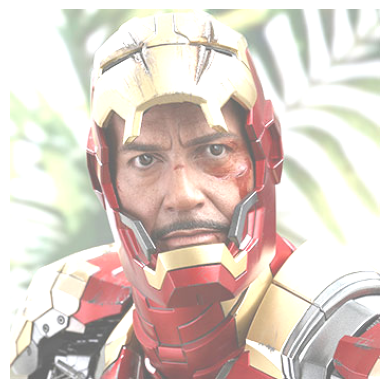

Saved test2_contrast.png


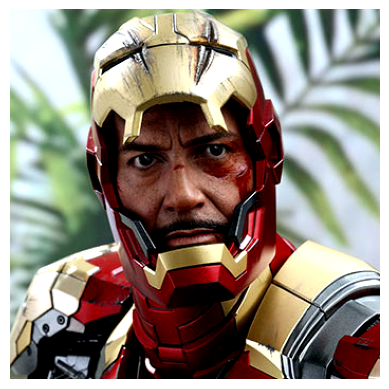

Saved test2_flip_horizontal.png


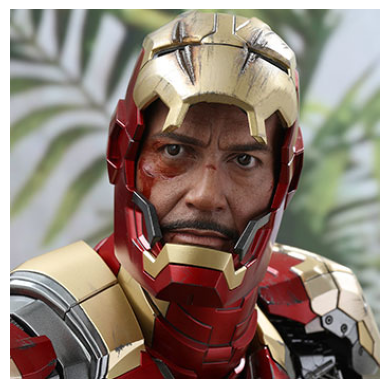

Saved test2_flip_vertical.png


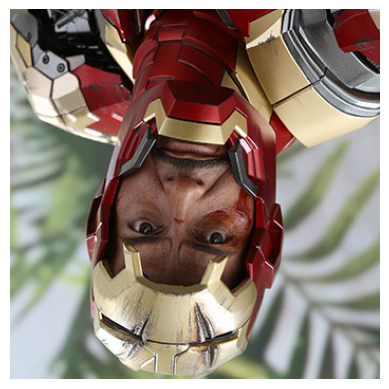

Saved test2_grayscale.png


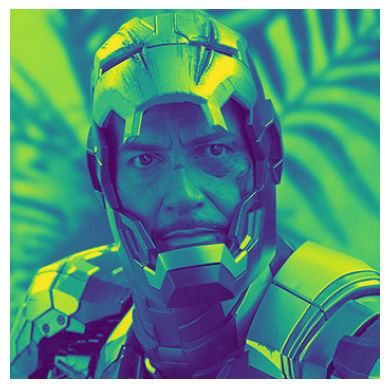

Saved test2_sepia.png


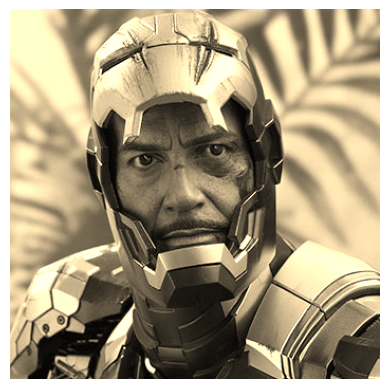

Saved test2_blur.png


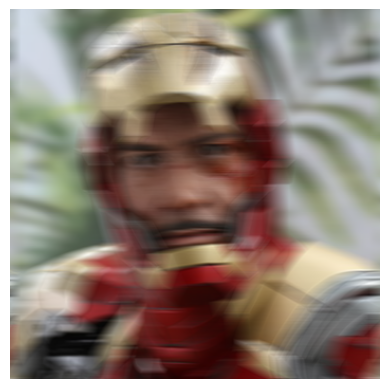

Saved test2_sharpen.png


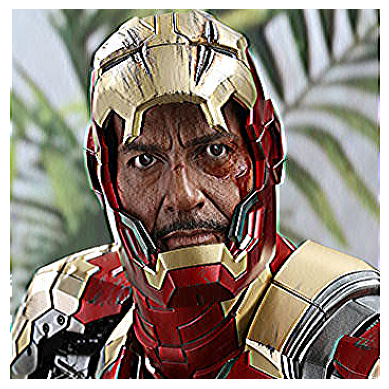

Saved test2_crop_center.png


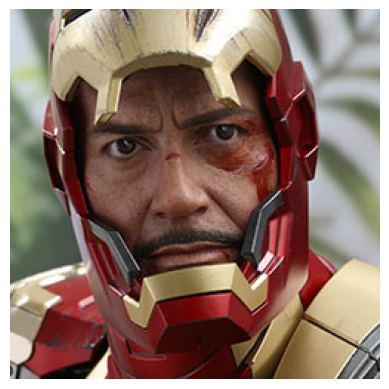

Saved test2_crop_circular.png


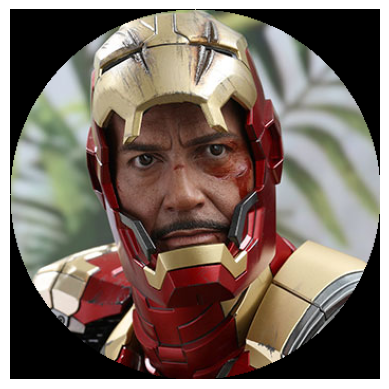

Saved test2_crop_double_elliptical.png


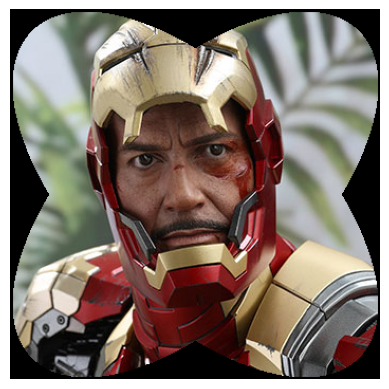

Saved test2_zoom_in.png


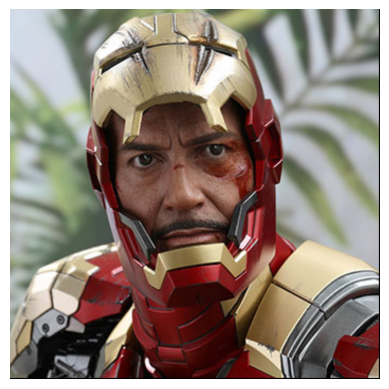

Saved test2_zoom_out.png


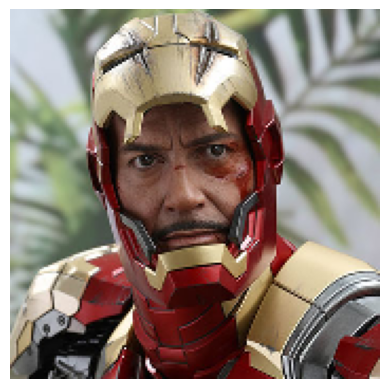

In [ ]:
# YOUR CODE HERE
def main():
    while True:
        file_name = input("Enter the image file name: ")
        image = read_img(file_name)
        
        print("Choose an image processing function:")
        print("1. Change exposure")
        print("2. Change contrast")
        print("3. Flip vertical/horizontal")
        print("4. Convert RGB to grayscale/sepia")
        print("5. Blur")
        print("6. Sharpen")
        print("7. Crop image by fixed size (crop at center)")
        print("8. Crop circular")
        print("9. Crop double elliptical")
        print("10. Zoom in")
        print("11. Zoom out")
        print("0. Perform all functions")
        
        choice = int(input("Enter your choice (0-11): "))
        
        if choice == 1:
            factor = float(input("Enter exposure factor: "))
            result = change_exposure(image, factor)
            output_name = file_name.split('.')[0] + "_exposure.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 2:
            factor = float(input("Enter contrast factor: "))
            result = change_contrast(image, factor)
            output_name = file_name.split('.')[0] + "_contrast.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 3:
            direction = input("Enter direction (horizontal/vertical): ")
            result = flip_image(image, direction)
            output_name = file_name.split('.')[0] + f"_flip_{direction}.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 4:
            sub_choice = input("Convert to (grayscale/sepia): ")
            if sub_choice == 'grayscale':
                result = convert_to_grayscale(image)
                output_name = file_name.split('.')[0] + "_grayscale.png"
            elif sub_choice == 'sepia':
                result = convert_to_sepia(image)
                output_name = file_name.split('.')[0] + "_sepia.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 5:
            result = blur_image(image)
            output_name = file_name.split('.')[0] + "_blur.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 6:
            result = sharpen_image(image)
            output_name = file_name.split('.')[0] + "_sharpen.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 7:
            width = int(input("Enter crop width: "))
            height = int(input("Enter crop height: "))
            result = crop_image_center(image, (width, height))
            output_name = file_name.split('.')[0] + "_crop_center.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 8:
            result = crop_circular(image)
            output_name = file_name.split('.')[0] + "_crop_circular.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 9:
            result = crop_double_elliptical(image)
            output_name = file_name.split('.')[0] + "_crop_double_elliptical.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 10:
            factor = float(input("Enter zoom in factor: "))
            result = zoom_in(image, factor)
            output_name = file_name.split('.')[0] + "_zoom_in.png"
            save_img(result, output_name)
            show_img(result)

        elif choice == 11:
            factor = float(input("Enter zoom out factor: "))
            result = zoom_out(image, factor)
            output_name = file_name.split('.')[0] + "_zoom_out.png"
            save_img(result, output_name)
            show_img(result)
        
        elif choice == 0:
            results = [
                (change_exposure(image, 100), "_exposure.png"),
                (change_contrast(image, 1.5), "_contrast.png"),
                (flip_image(image, 'horizontal'), "_flip_horizontal.png"),
                (flip_image(image, 'vertical'), "_flip_vertical.png"),
                (convert_to_grayscale(image), "_grayscale.png"),
                (convert_to_sepia(image), "_sepia.png"),
                (blur_image(image), "_blur.png"),
                (sharpen_image(image), "_sharpen.png"),
                (crop_image_center(image, (250, 250)), "_crop_center.png"),
                (crop_circular(image), "_crop_circular.png"),
                (crop_double_elliptical(image), "_crop_double_elliptical.png"),
                (zoom_in(image, 2), "_zoom_in.png"),
                (zoom_out(image, 2), "_zoom_out.png")
            ]
            for res, suffix in results:
                output_name = file_name.split('.')[0] + suffix
                save_img(res, output_name)
                print(f"Saved {output_name}")
                show_img(res)
        
        cont = input("Continue (1) or exit (0)? ")
        if cont == "0":
            break
            
            
if __name__ == "__main__":
    main()